## Olivetti Faces Dataset Description

The Olivetti Faces dataset is a popular dataset for testing and evaluating face recognition algorithms. It was created by AT&T Laboratories Cambridge and contains a set of grayscale images of faces, captured under different lighting conditions, facial expressions, and poses.

The dataset contains a total of **400 images**, each of size **64 x 64 pixels**. There are 10 different images for each of 40 distinct individuals, with each individual photographed in different sessions. The images were taken with a Canon camera, under controlled conditions that included a uniform background and controlled lighting.

The Olivetti Faces dataset is often used for tasks such as face recognition, face detection, and facial expression analysis. The dataset is popular because it is relatively small, making it easy to work with, and because it contains images that capture a wide range of facial variations.

The dataset is available in the scikit-learn Python library, which makes it easy to load and use for machine learning tasks. In scikit-learn, the Olivetti Faces dataset is provided as a dictionary with two keys: data and images. The data key contains a 2D array of the flattened image data, while the images key contains a 3D array of the original image data.


## Task 0 

Load the dataset using Python	

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA


# Load the dataset
faces = datasets.fetch_olivetti_faces()
data = faces.data       # Input data or input features
target = faces.target   # Label or Class or Variable to be predicted

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=100, whiten=True)
X = pca.fit_transform(data)              ## X Represents the data and you will use for model training

# Size of the datset  
X.shape     # (Number of images, input feature)

(400, 100)

## Task 1: Data Visualisation

Visualize some of the images in the dataset. 

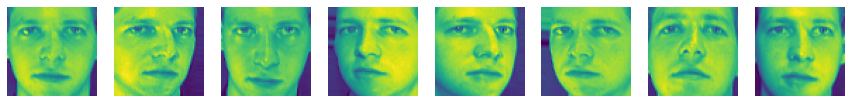

In [2]:
# your code will go here
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(faces.images[i])
    plt.axis('off')
plt.show()

#### From displaying the first 8 images of the Olivetti Faces dataset, we see photos OF a distinct man, overall the only noticeable differences are that each photo, the man is either facing the camera head on, or with a tilt in different directions

## Task 2: Training a Traditional Machine Learning Model

#### The algorithm I will be using is K-Nearest-Neighbours, I felt this would be appropriate as it is a classification algorithm that can be used by training the dataset of the images and then using it to predict the label of a new image, its especially useful when our dataset is not too large, such as this one.

In [3]:
# your code will go here
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, target, train_size=0.8)

#### Before fitting our KNN Model, we will first be finding the optimal K Value, generally we can say K val. = sqrt(n), however, for maximum accuracy I will be using an accuracy plot to find the most optimal value for K.

Text(0, 0.5, 'Accuracy')

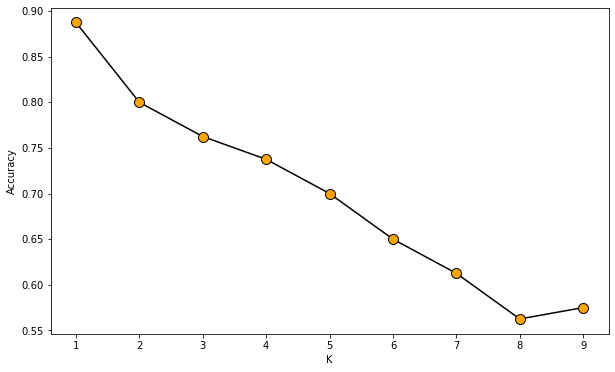

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
ac = []

for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    ac.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,10), ac, color = 'black', markerfacecolor='orange', markersize = 10, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')

##### From the accuracy plot we can see that as K increases, the accuracy depresses, so we will declare our most optimal K value as 1

In [5]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)

print('The accuracy of our K-Nearest-Neighbours Model is:', accuracy)

The accuracy of our K-Nearest-Neighbours Model is: 0.8875


## Task 3: Training a Neural Network-based Model

In [6]:
# your code will go here
from sklearn.neural_network import MLPClassifier

x_trainMLP, x_testMLP, y_trainMLP, y_testMLP = train_test_split(X, target, train_size=0.8)

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(90,))

mlp.fit(x_trainMLP, y_trainMLP)

ypredmlp = mlp.predict(x_testMLP)

accuracyMLP = accuracy_score(ypredmlp, y_testMLP)
print(accuracyMLP)

0.8125


e:\anconda-navigator\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Task 4: Comparison 

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Text(1449.3333333333335, 0.5, 'Accuracy Scores')

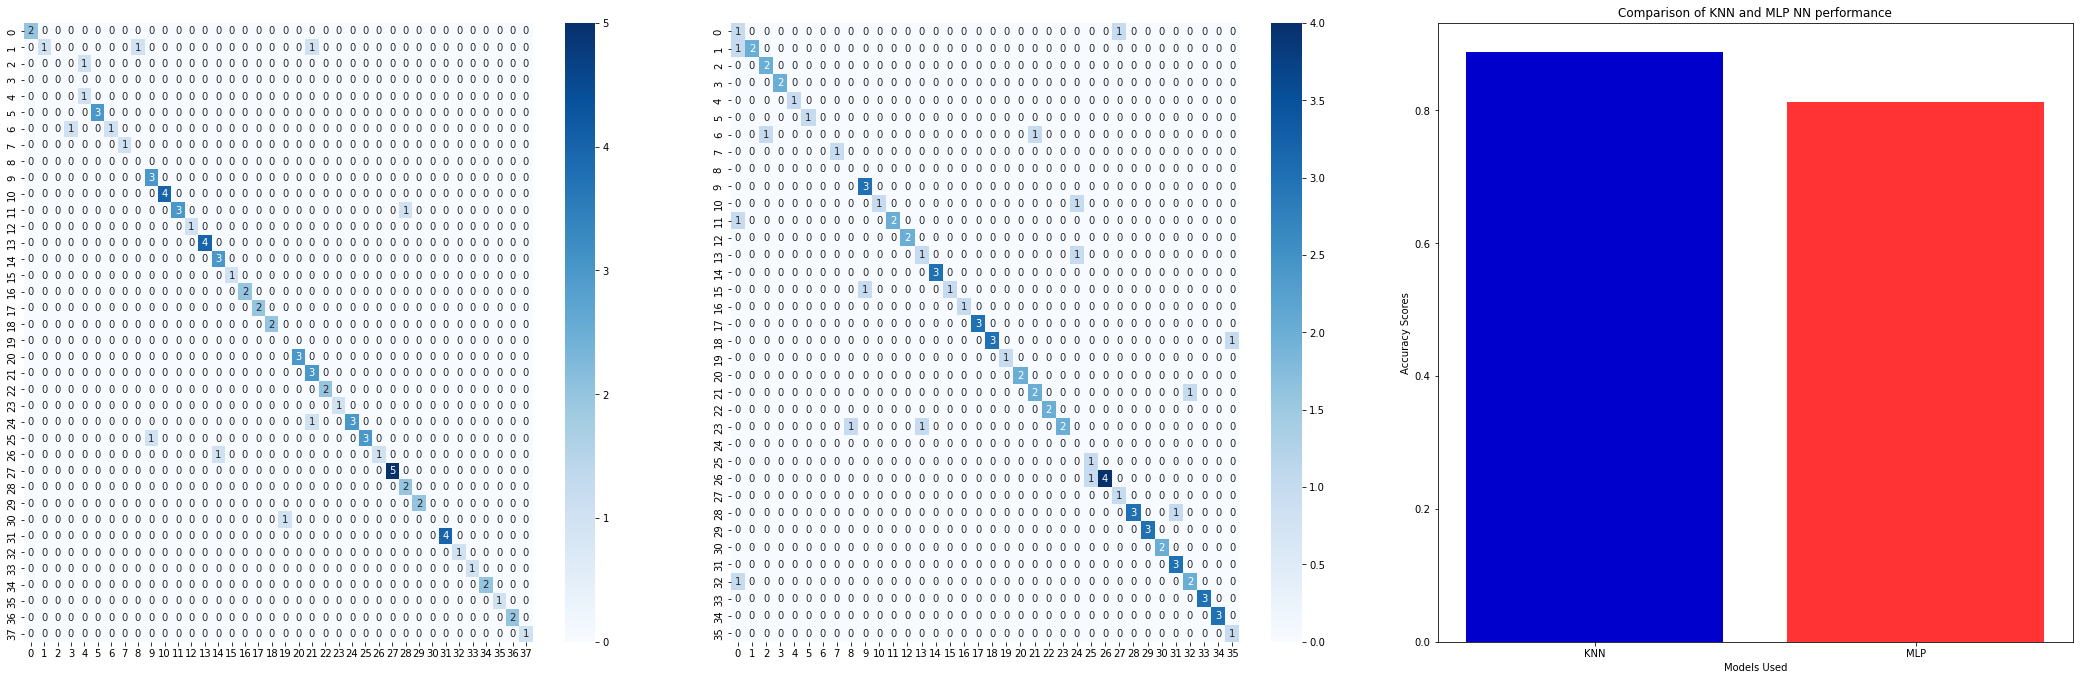

In [9]:
categories = ['KNN', 'MLP']
accuracies = [accuracy, accuracyMLP]
colors = ['#0000CC', '#FF3333']
cmKNN = confusion_matrix(y_test, y_pred)
cmMLP = confusion_matrix(y_testMLP, ypredmlp)

fig, axes = plt.subplots(figsize=(30,10), ncols=3)
fig.tight_layout(pad=4)

#sns.scatterplot(y_test, y_pred, color = colors[0], ax=axes[0], label='KNN')
#sns.scatterplot(y_testMLP, ypredmlp, color = colors[1], ax=axes[1], label='MLP')
sns.heatmap(cmKNN, annot=True, cmap="Blues", ax= axes[0], label='KNN')
sns.heatmap(cmMLP, annot=True, cmap="Blues" , ax= axes[1],  label='MLP')

plt.bar(categories, accuracies, color=colors)
plt.title("Comparison of KNN and MLP NN performance")
plt.xlabel('Models Used')
plt.ylabel('Accuracy Scores')

### Evaluation
##### From evaluating the K Nearest Neighbour machine learning model and the Multi-layer Perceptron neural network classifier, we can see that the MLP neural network performed better compared to the KNN model for image classification.
##### Turning our attention to the 2 heatmaps in the subplot (Left being KNN, right being MLP), whilst cryptic at first, we can see a linear trend in both plots, this denotes an accurate prediction whilst anything outside of the linear line tells us what was inaccurately predicted, since both plots look fairly similar and doesn't immediately show any significant differences between the 2 models, the barplot tells us the rest of the story by showing us the accuracy scores between both models, with a clear indication of the KNN Machine learning model outperforming the MLP neural network model in this instance.
#### However this doesn't necessarily mean one model is better than the other, in this instance KNN performed better for a few reasons, one being the size of the data being fairly miniscule, KNN is known to perform very well on small data sets. This is because KNN calculates its distance to all points in training data, when the dataset is small, the probability of it discovering closer points which represent the underlying patterns in the data is much higher. Compare this to our Nerual Network (which is parametic in nature) usually requires large amounts of data to estimate the model parameters accurately.


## Task 5: Social Implications

Finally, you will research and discuss two specific social implications of facial recognition technology:

1. **Bias and discrimination:** How can facial recognition technology lead to bias and discrimination? What steps can we take to address these issues?
2. **Law enforcement:** How is facial recognition technology being used by law enforcement agencies? What are the benefits and risks of using this technology in law enforcement?

### Discussion on the bias and discrimination that can be prevelant in ML/AI models

##### Facial recognition technology uses classification algorithms and models to identify someone (or something), we already know that machine learning and neural network algorithms are trained on datasets of images, which take many factors such as gender, age and of course ethnicity, if the dataset isn't diverse, it can lead to difficulties recognising certain faces, which can lead to innacurate or biased outcomes. It can also be misused to maliciously target specific groups of people in certain minority groups or even political activists.
##### The best steps we can take as developers is to firstly ensure that we're diversifying our data to include people from a wide range of ethnicities, genders, and ages. This ensures diversity, and helps the model perform better on people from various minority groups. We can make sure that there are regulations for the use of these technologies as they are very powerful, also ensuring that the engineers are kept accontable via laws and regulations. And lastly even diversifying the actual development team can greatly help alleviate the issue of bias and discrimination.

### Discussion on how law enforcement uses Facial Recognition technology, as well as the benefits and risks of it.

##### Law enforcement uses this technology to mainly to identify criminals, but it is also used in public settings to monitor what is happening, and also can be used for investigations. 
##### This is benefitial as it zeroes out suspects by indentifying them with the existing footage which effectively helps police, this even helps alleviate crimes as criminals will be more reluctant to do something on the fear of being caught. The problem however, arises with false positives and/or negatives, sometimes the technology can false identify someone which might lead to wrongful convictions, even with the use of other "solutions" people could manipulate the footage for malicious reasons. Amongst this, we know that these cameras are used in public spaces, some people might be unaware that they are under survellience and there facial images are being stored in government databases, which is a big privacy concern.